In [3]:
import cv2
import numpy as np
from IPython.display import Image, Video

In [4]:
Video('video3.mp4')

In [5]:
#модель нейросети
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg.txt')

In [6]:
with open('coco.names.txt') as f:
    classes = f.read().split('\n')

In [7]:
#классы для распознавания модели
classes

['person',
 'bicycle',
 'car',
 'motorbike',
 'aeroplane',
 'bus',
 'train',
 'truck',
 'boat',
 'traffic light',
 'fire hydrant',
 'stop sign',
 'parking meter',
 'bench',
 'bird',
 'cat',
 'dog',
 'horse',
 'sheep',
 'cow',
 'elephant',
 'bear',
 'zebra',
 'giraffe',
 'backpack',
 'umbrella',
 'handbag',
 'tie',
 'suitcase',
 'frisbee',
 'skis',
 'snowboard',
 'sports ball',
 'kite',
 'baseball bat',
 'baseball glove',
 'skateboard',
 'surfboard',
 'tennis racket',
 'bottle',
 'wine glass',
 'cup',
 'fork',
 'knife',
 'spoon',
 'bowl',
 'banana',
 'apple',
 'sandwich',
 'orange',
 'broccoli',
 'carrot',
 'hot dog',
 'pizza',
 'donut',
 'cake',
 'chair',
 'sofa',
 'pottedplant',
 'bed',
 'diningtable',
 'toilet',
 'tvmonitor',
 'laptop',
 'mouse',
 'remote',
 'keyboard',
 'cell phone',
 'microwave',
 'oven',
 'toaster',
 'sink',
 'refrigerator',
 'book',
 'clock',
 'vase',
 'scissors',
 'teddy bear',
 'hair drier',
 'toothbrush',
 '']

In [8]:
img = cv2.imread('photo2.jpg')
height, width, depth = img.shape
img.shape

(4032, 3024, 3)

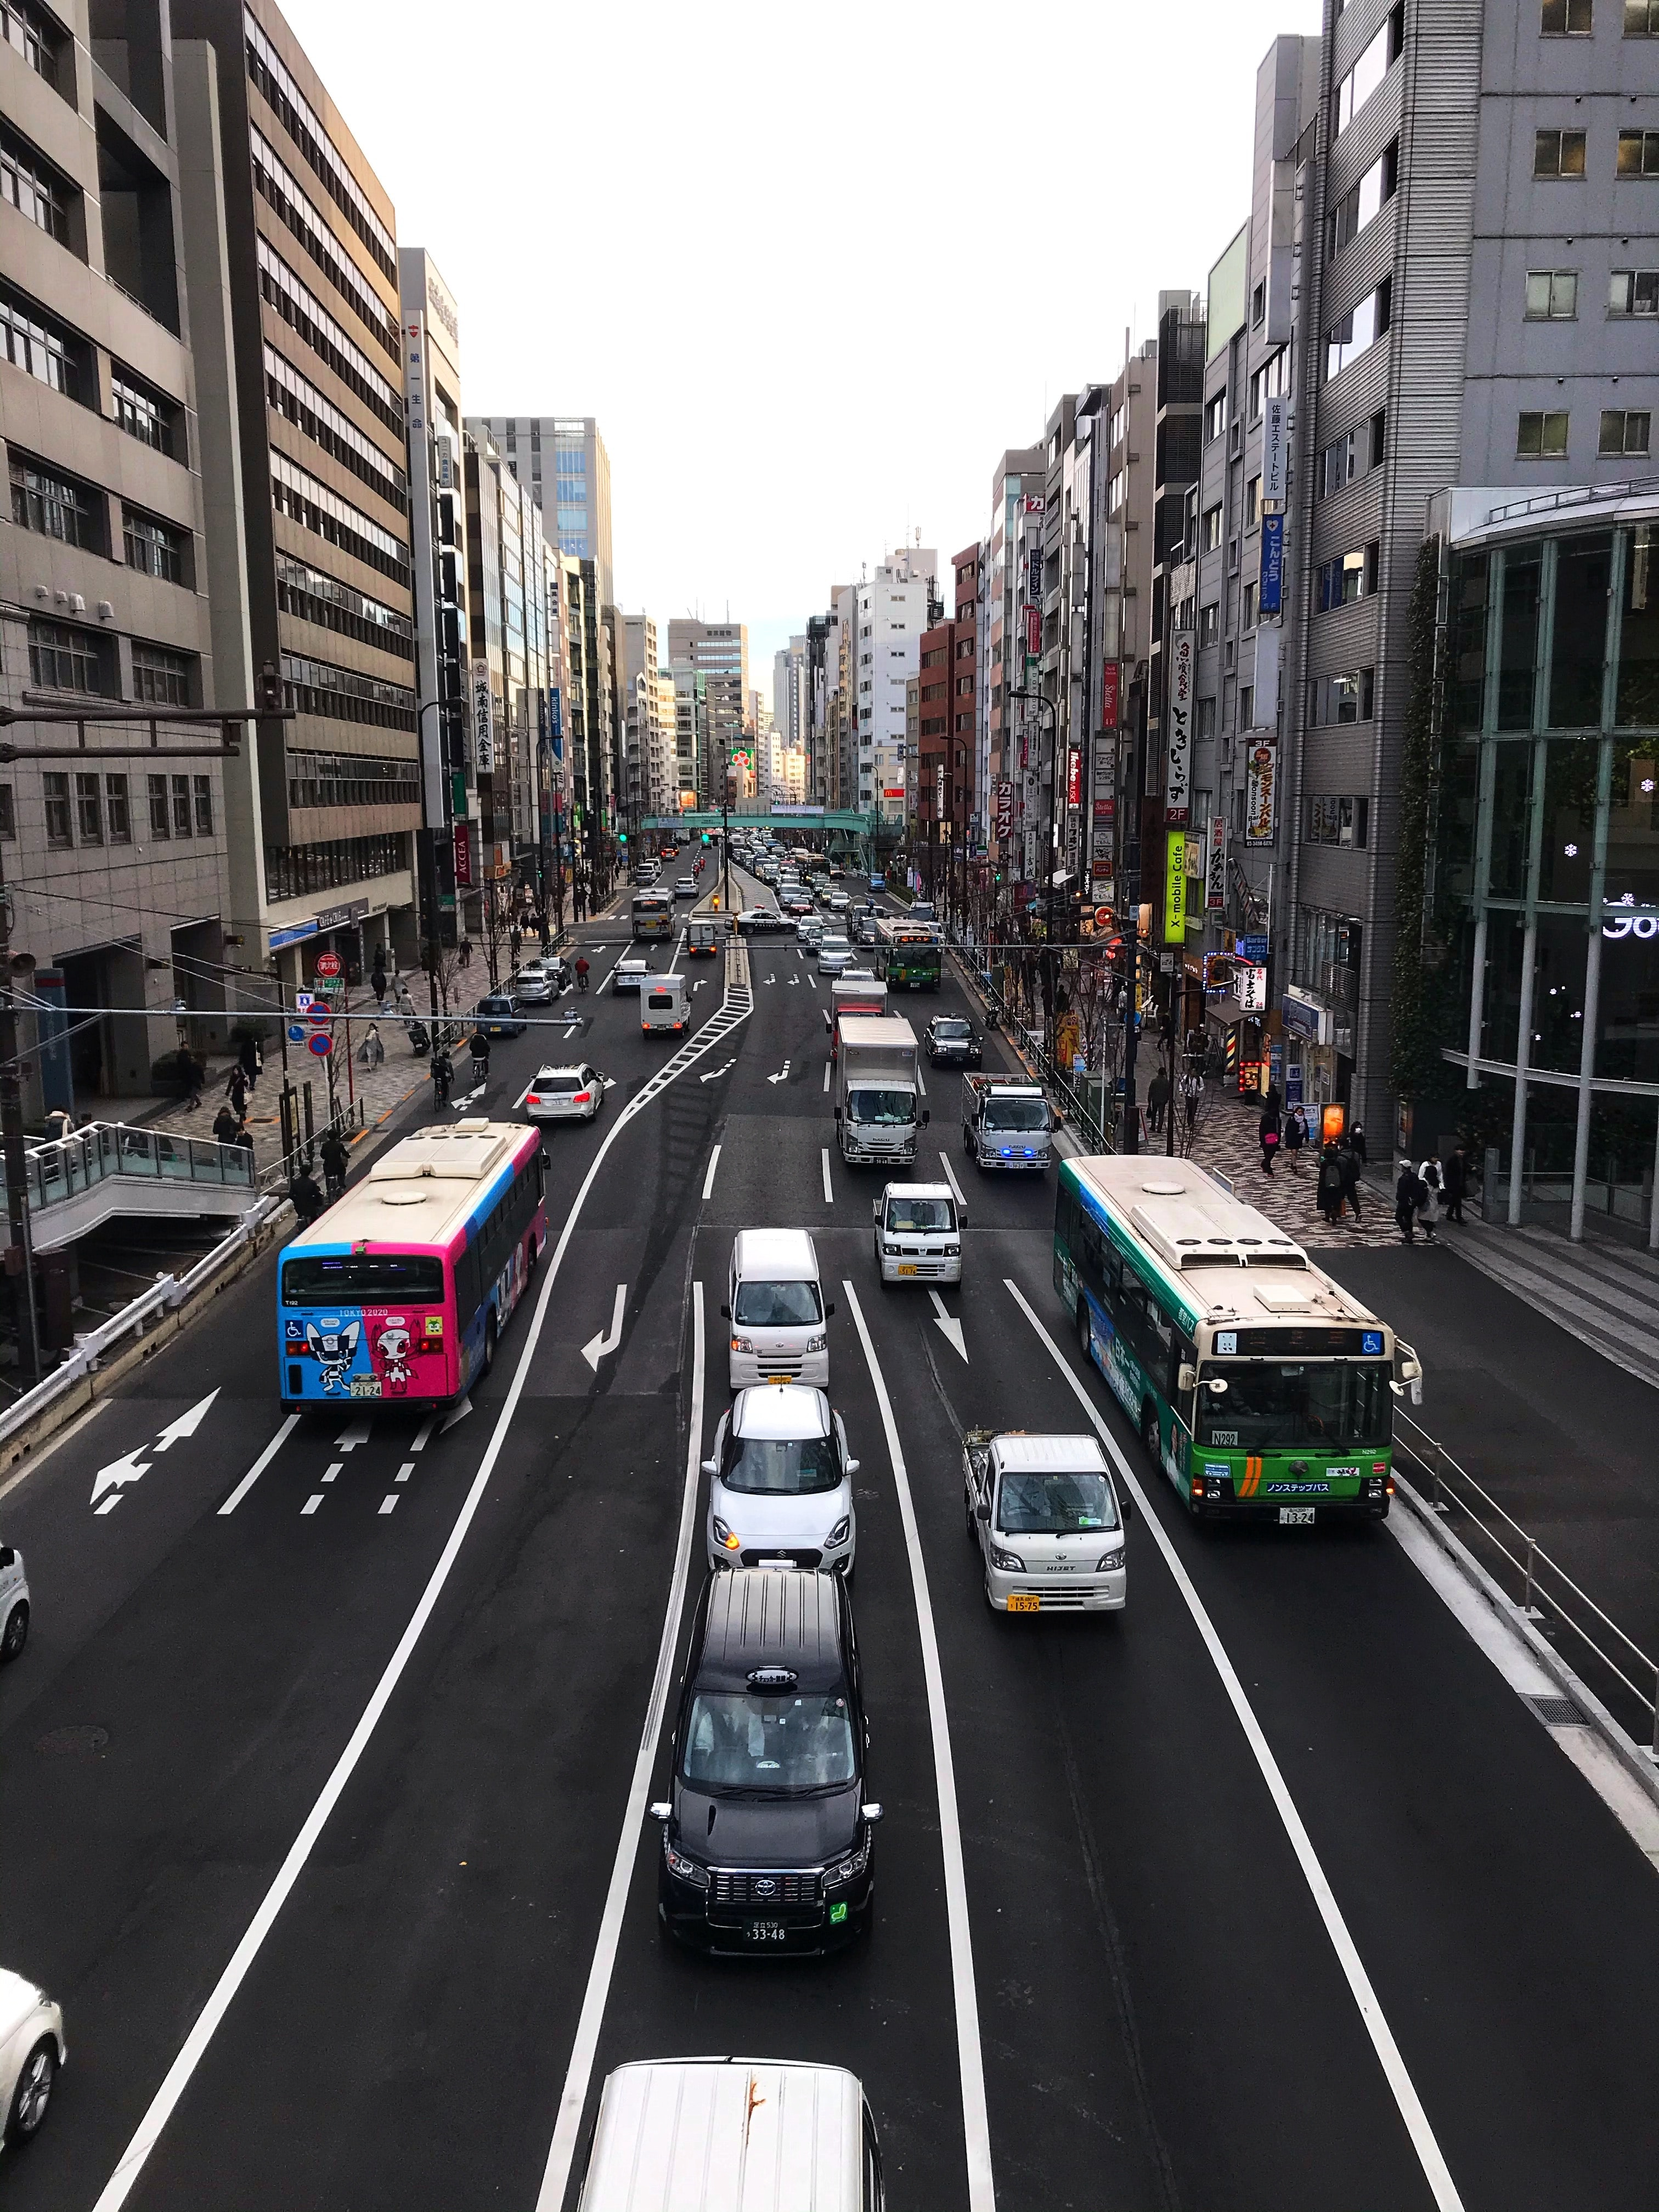

In [9]:
Image('photo2.jpg')

In [10]:
#функция blobFromImage из библиотеки dnn преобразует изображения для нейросети
blob = cv2.dnn.blobFromImage(img, 1/255, (608,608), (0,0,0), swapRB=True, crop=False)

In [11]:
#передача преобразованного изображения blob на вход нейросети
net.setInput(blob)

In [12]:
#функция дает имена всех слоев и индексы выходных слоев
layer_names = net.getLayerNames()
out_layers_indexes = net.getUnconnectedOutLayers()
out_layers = [layer_names[i - 1] for i in out_layers_indexes]

In [13]:
#выходы получаем не только из последнего слоя, но и из предпоследних, поскольку одни слои генерируют прямоугольники для классов,
#а есть слои, которые генерируют вероятности отнесения изображения к классам
out_layers

['yolo_82', 'yolo_94', 'yolo_106']

In [14]:
#функция forward берет на вход изображение (3 объекта, каждый из которых массив) и прогоняет через нейросеть
outs = net.forward(out_layers)

In [15]:
#3 выхода и каждый нашел свои объекты (3 вида объектов - машин)
for out in outs:
    print(out)

[[0.02410295 0.0351133  0.270741   ... 0.         0.         0.        ]
 [0.03376992 0.02768449 0.2051954  ... 0.         0.         0.        ]
 [0.03334966 0.02958307 0.5094935  ... 0.         0.         0.        ]
 ...
 [0.9755985  0.9676084  0.28549784 ... 0.         0.         0.        ]
 [0.9752968  0.9753242  0.21320406 ... 0.         0.         0.        ]
 [0.9779949  0.97230035 0.58647496 ... 0.         0.         0.        ]]
[[0.01487671 0.01661567 0.0314521  ... 0.         0.         0.        ]
 [0.01244253 0.01314901 0.2264849  ... 0.         0.         0.        ]
 [0.01464996 0.01068064 0.04859835 ... 0.         0.         0.        ]
 ...
 [0.9825196  0.9855144  0.03006121 ... 0.         0.         0.        ]
 [0.9891456  0.9854843  0.28726092 ... 0.         0.         0.        ]
 [0.9873271  0.98877805 0.04871843 ... 0.         0.         0.        ]]
[[0.00516885 0.00528138 0.00927537 ... 0.         0.         0.        ]
 [0.00616651 0.00751568 0.01204015 ... 

In [16]:
#вызываем функцию, которая будет рисовать контейнер, состоящий из изображений (прямоугольники)
#на вход подается изображение и на выходе получается измененное изображение
def draw_object(img, index, score, box):
    x, y, w, h = box
    start = (x, y)
    end = (x + w, y + h)
    color = (0, 255, 0)
    width = 2
    img = cv2.rectangle(img, start, end, color, width)

    start = (x, y - 10)
    font_size = 1
    font = cv2.FONT_HERSHEY_SIMPLEX 
    width = 2
    text = classes[index] #  + ' ' + str(score)
    img = cv2.putText(img, text, start, font, font_size, color, width, cv2.LINE_AA)
    
    return img

In [17]:
#объявим хранилище индексов классов получаемых изображений (объектов), для определения объекта по индексу
class_indexes = []
#объявим хранилице вероятностей принадлежности к классам получаемых изображений
class_scores = []
#объявим хранилице контейнеров изображений
boxes = []
#первая строка - координаты вектора, остальные - вероятности (scores) соответствия каким-либо классам
for out in outs:
    for obj in out:
        #print(obj)
#берем индексы, начиная с пятого, поскольку до пятого хранятся координаты изображения        
        scores = obj[5:]
#находим max вероятность или индекс самого лучшего класса
        class_index = np.argmax(scores)
        #print(class_index)
        class_score = scores[class_index]
        if class_score > 0:
            print(class_index, class_score)           
#координаты (центр, ширину и высоту изображения), которые получим от сети адаптируем под размер нашего Image
            center_x = int(obj[0] * width)
            center_y = int(obj[1] * height)
            obj_width = int(obj[2] * width)
            obj_height = int(obj[3] * height)
#левая координата x и верхняя координата y
            x = center_x - obj_width // 2
            y = center_y - obj_height // 2
#поместим полученное изображение в контейнер
            box = [x, y, obj_width, obj_height]
#добавляем в хранилице текущий контейнер
            boxes.append(box)
#необходимо сохранить класс и вероятность принадлежности к классу, которые определили
            class_indexes.append(class_index)
            class_scores.append(float(class_score))

5 0.9714021
5 0.990991
5 0.94801575
5 0.3916906
5 0.9667039
5 0.22434068
2 0.49043033
2 0.9948215
2 0.7115438
7 0.36836967
7 0.6901779
7 0.47391465
5 0.87201196
2 0.3154202
2 0.75016403
2 0.9825402
2 0.9942092
2 0.632853
2 0.34100968
2 0.6286005
2 0.9995075
2 0.99622786
2 0.929937
2 0.47791806
2 0.9721623
2 0.9766563
2 0.9694313
2 0.9960195
2 0.81987923
2 0.69052184
2 0.78984535
9 0.24201998
9 0.20645107
9 0.4717869
2 0.43643272
2 0.24334347
2 0.5663305
2 0.82709724
2 0.535183
2 0.3498225
2 0.81356
2 0.51114047
2 0.7047934
2 0.34276652
2 0.3819153
2 0.25596794
2 0.5065201
0 0.23744376
0 0.3388618
0 0.21399084
0 0.24977654
2 0.20928575
2 0.7608978
2 0.21926787
2 0.6292031
2 0.76777494
2 0.33333993
5 0.324795
5 0.4590879
0 0.42153376
2 0.91036993
2 0.23060887
0 0.49398258
2 0.9182951
2 0.41736692
2 0.4941357
2 0.26544443
2 0.3904306
2 0.25093842
2 0.7144785
2 0.56366134
2 0.68575174
2 0.33089823
2 0.47716752
2 0.37679705
2 0.9652384
2 0.830328
2 0.31218782
0 0.5341818
0 0.5093003
0 0.272

In [18]:
#метод non-maximum supression (NMS) выбирает (оставляет) только квадраты непересекающиеся с квадратами других объектов
chosen_boxes = cv2.dnn.NMSBoxes(boxes, class_scores, 0.0, 0.2)

In [19]:
#все квадраты
boxes

[[519, 2017, 454, 577],
 [503, 2044, 474, 602],
 [1920, 2046, 596, 769],
 [1848, 1944, 686, 925],
 [1944, 2062, 588, 755],
 [1891, 2000, 712, 819],
 [1202, 2836, 404, 629],
 [1221, 2945, 375, 644],
 [1235, 2965, 399, 609],
 [1515, 1847, 146, 273],
 [1525, 1855, 143, 272],
 [1524, 1887, 153, 268],
 [557, 1989, 393, 600],
 [1587, 2131, 159, 240],
 [1603, 2127, 156, 244],
 [1316, 2242, 201, 327],
 [1306, 2254, 222, 304],
 [1324, 2254, 225, 295],
 [1311, 2302, 203, 306],
 [1308, 2302, 214, 299],
 [1286, 2538, 277, 322],
 [1299, 2530, 273, 335],
 [1736, 2567, 325, 370],
 [1750, 2568, 332, 368],
 [1736, 2603, 328, 347],
 [1736, 2598, 357, 358],
 [1200, 2769, 398, 771],
 [1190, 2893, 409, 675],
 [1198, 3004, 392, 592],
 [-2, 3415, 128, 531],
 [-2, 3530, 132, 445],
 [1244, 1439, 21, 32],
 [1128, 1507, 14, 33],
 [1276, 1506, 27, 31],
 [1198, 1541, 35, 32],
 [1247, 1556, 29, 32],
 [1159, 1592, 49, 45],
 [1228, 1587, 45, 46],
 [1423, 1605, 46, 38],
 [1503, 1610, 49, 40],
 [1147, 1629, 83, 73],
 [

In [20]:
#квадраты после метода NMS
for box_index in chosen_boxes:
    print(box_index)

20
85
27
16
1
25
4
75
63
93
60
37
112
109
40
116
30
55
52
84
69
42
91
71
54
106
36
95
89
38
79
46
62
97
73
33
110
98
58
34
59
44
39
48
101
83
50
88
35
31
82
47
49
94
32


In [21]:
#итерируемся по всем контейнерам, которые получились
for box_index in chosen_boxes:
#   box_index = box_index[0]
    img = draw_object(img, class_indexes[box_index], class_scores[box_index], boxes[box_index])

In [22]:
# for index, score, box in zip(class_indexes, class_scores, boxes):
#     img = draw_object(img, index, score, box)

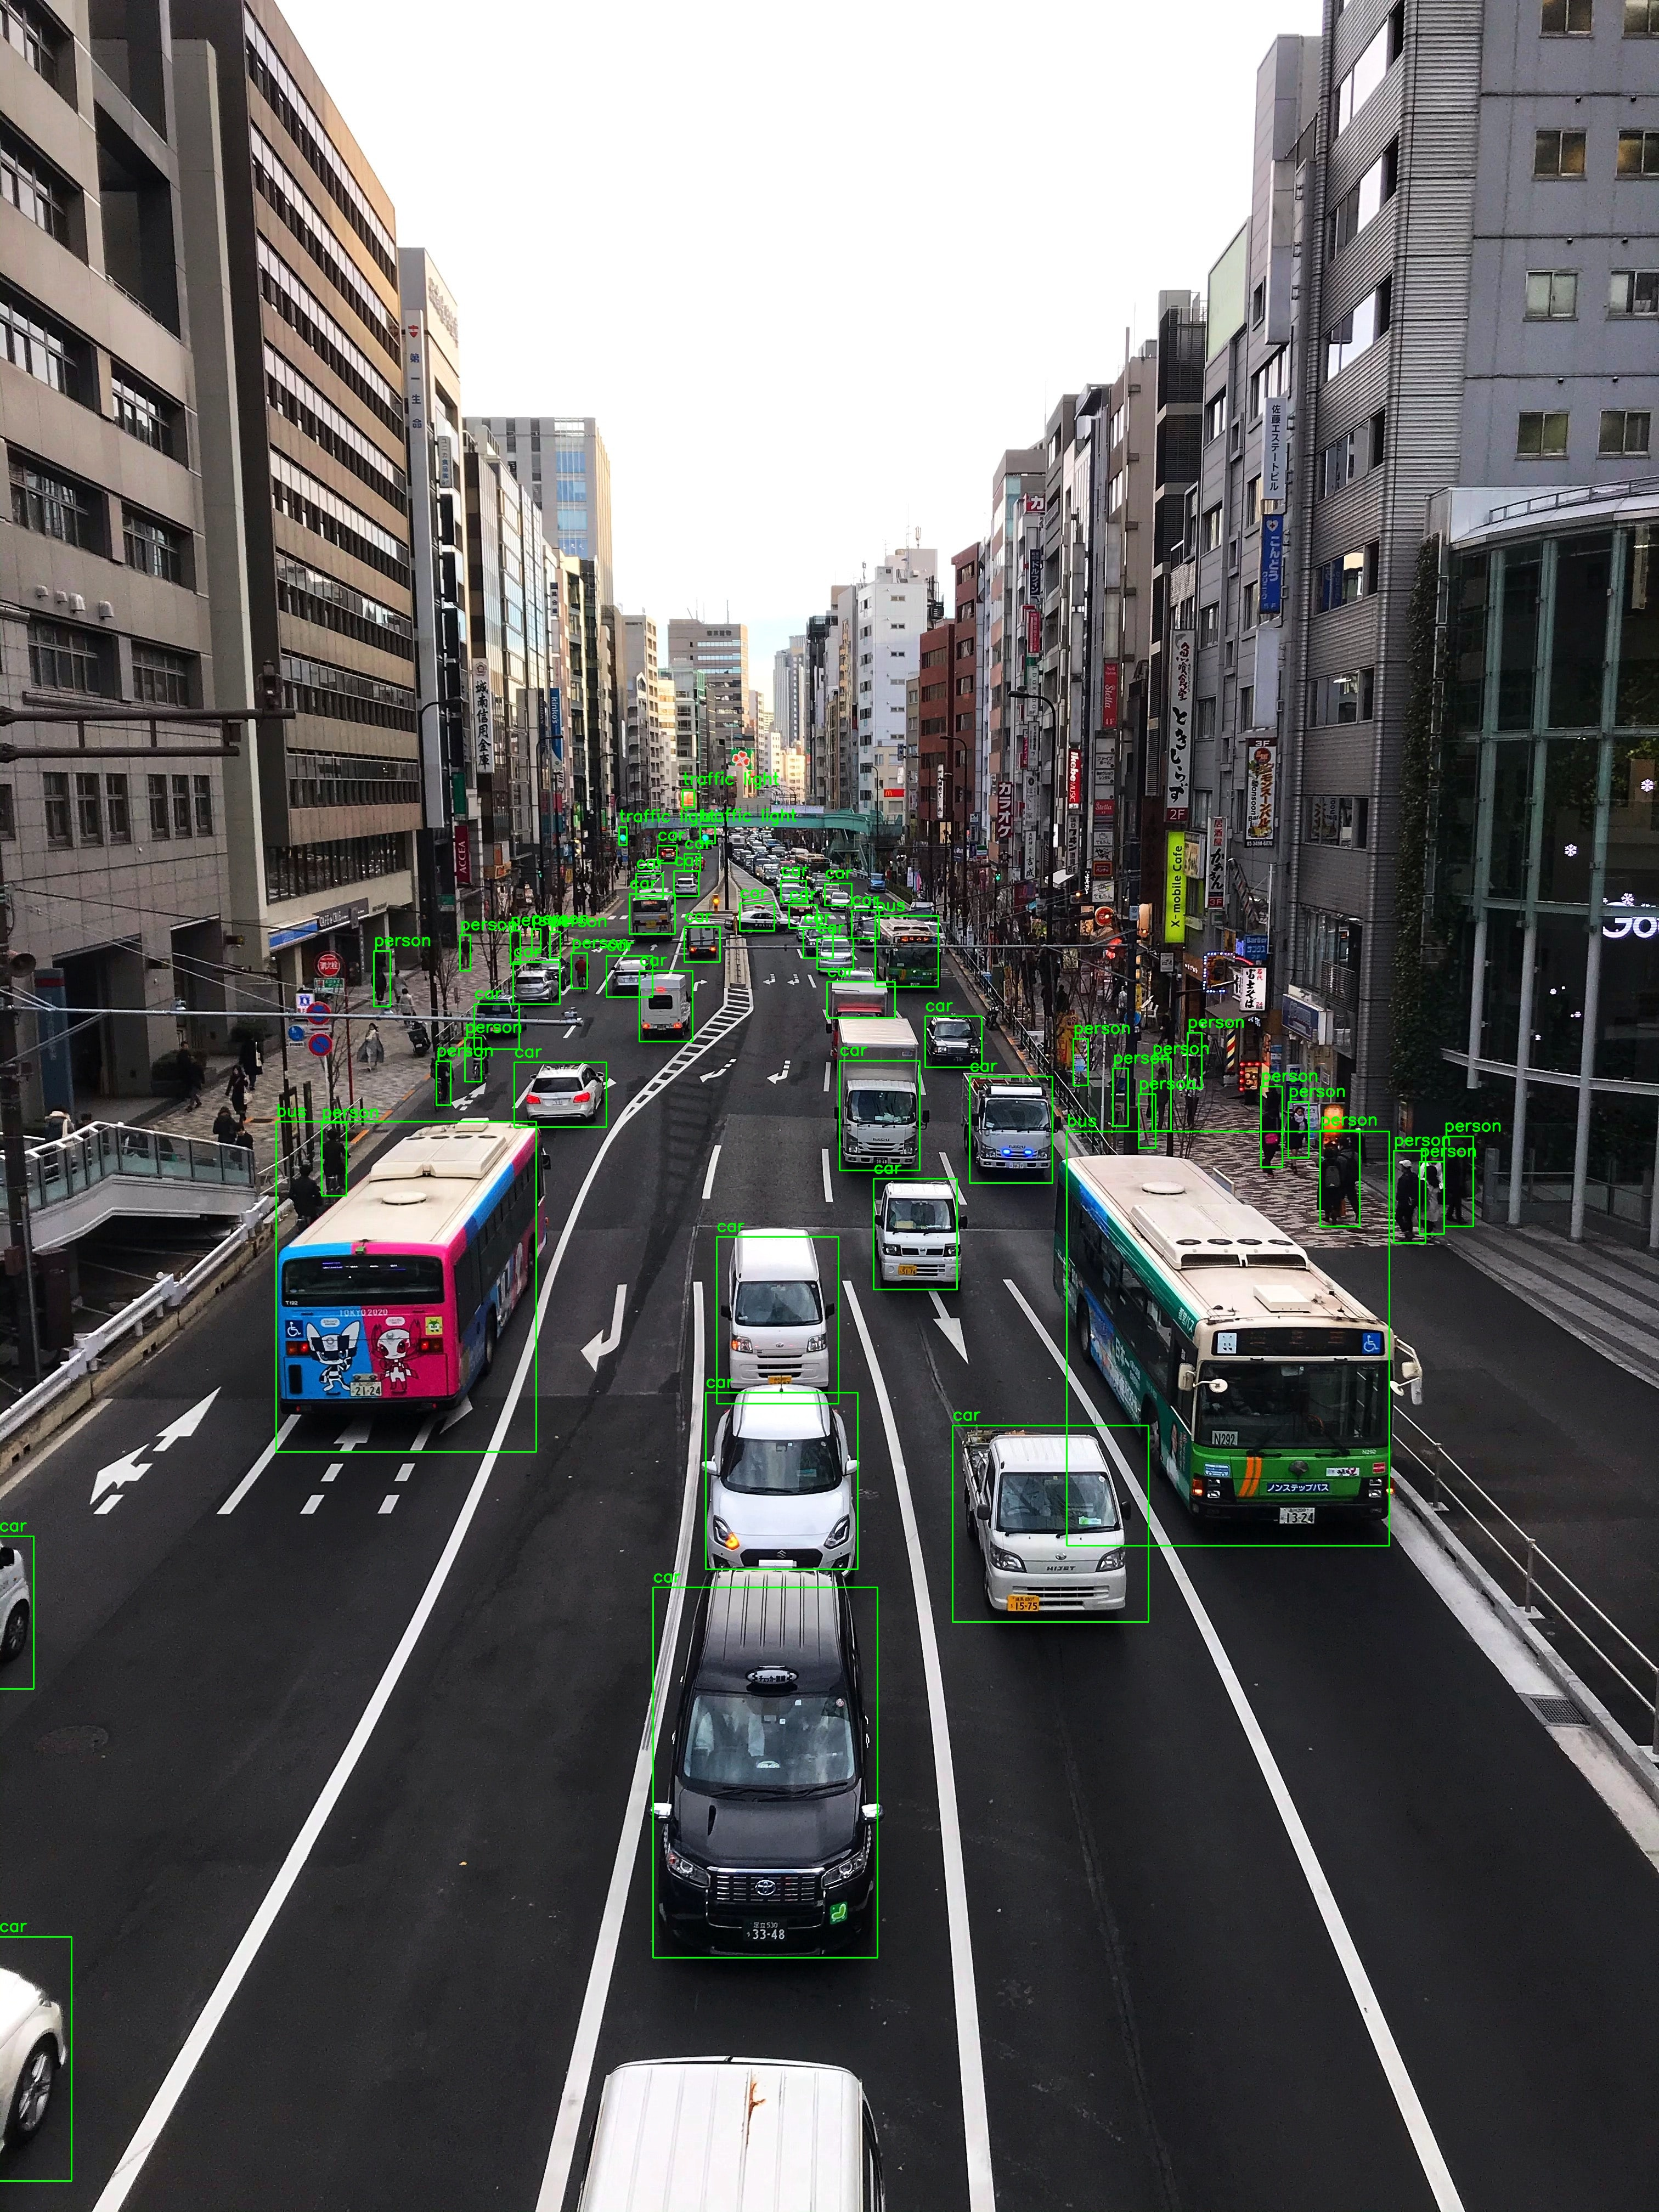

In [23]:
cv2.imwrite('photo2_test6.jpg', img)
Image('photo2_test6.jpg')

In [24]:
import cv2
import numpy as np
from IPython.display import Image, Video

In [25]:
#модель нейросети
net = cv2.dnn.readNet('yolov3.weights', 'yolov3.cfg.txt')
#функция дает имена всех слоев и индексы выходных слоев
layer_names = net.getLayerNames()
out_layers_indexes = net.getUnconnectedOutLayers()
out_layers = [layer_names[index - 1] for index in out_layers_indexes]
#применяемые классы
with open('coco.names.txt') as f:
    classes = f.read().split('\n')

In [26]:
#вызываем функцию, которая будет рисовать контейнер, состоящий из изображений (прямоугольники)
#на вход подается изображение и на выходе получается измененное изображение
def draw_object(img, index, score, box):
    x, y, w, h = box
    start = (x, y)
    end = (x + w, y + h)
    color = (0, 255, 0)
    width = 2
    img = cv2.rectangle(img, start, end, color, width)

    start = (x, y - 10)
    font_size = 1
    font = cv2.FONT_HERSHEY_SIMPLEX 
    width = 2
    text = classes[index]  # + ' ' + str(score)
    img = cv2.putText(img, text, start, font, font_size, color, width, cv2.LINE_AA)
    
    return img

In [27]:
def apply_yolo(img):
    height, width, depth = img.shape
    blob = cv2.dnn.blobFromImage(img, 1/255, (608,608), (0,0,0), swapRB=True, crop=False)
    net.setInput(blob)
    outs = net.forward(out_layers)
    
    class_indexes = []
    class_scores = []
    boxes = []

    for out in outs:
        for obj in out:
            scores = obj[5:]
            class_index = np.argmax(scores)
            class_score = scores[class_index]
            if class_score > 0:
                center_x = int(obj[0] * width)
                center_y = int(obj[1] * height)
                obj_width = int(obj[2] * width)
                obj_height = int(obj[3] * height)

                x = center_x - obj_width // 2
                y = center_y - obj_height // 2

                box = [x, y, obj_width, obj_height]
                boxes.append(box)
                class_indexes.append(class_index)
                class_scores.append(float(class_score))
    
    chosen_boxes = cv2.dnn.NMSBoxes(boxes, class_scores, 0.0, 0.2)

    for box_index in chosen_boxes:
        box_index = box_index
        img = draw_object(img, class_indexes[box_index], class_scores[box_index], boxes[box_index])
    
        return img

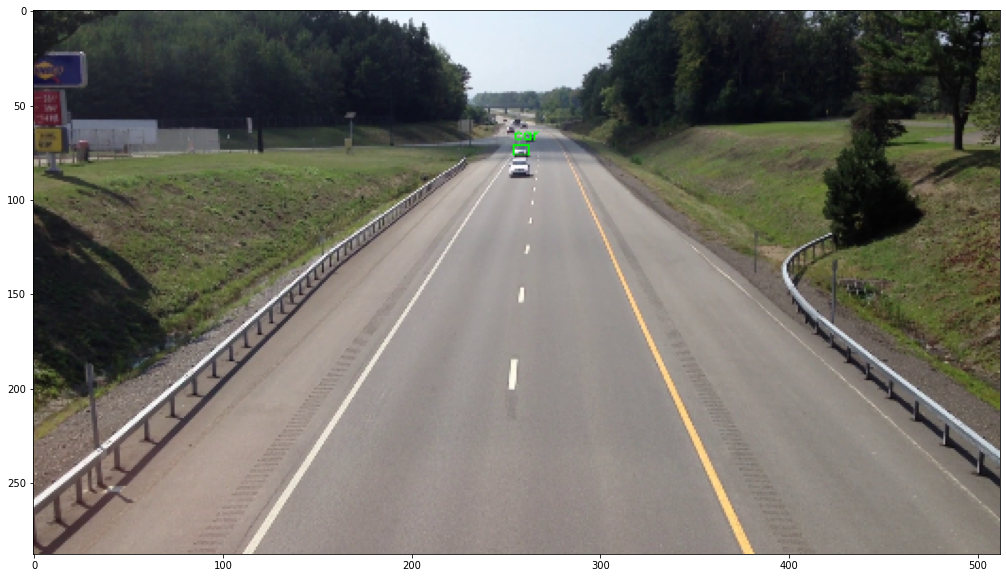

In [ ]:
import cv2
import matplotlib.pyplot as plt
from IPython import display

cap = cv2.VideoCapture('video3.mp4')

while cap.isOpened():
    ret, frame = cap.read()
    if not ret:
        break
#функция применяет нейросеть и возвращает результат
    frame = apply_yolo(frame)    
        
#функция преобразует цвета фрейма перед выводом    
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
#функция уменьшает размер фрейма в 2 раза чтобы сократить время его отрисовки
    frame = cv2.resize(frame, (2560 // 5, 1440 // 5))
 
    plt.figure(figsize=(20,10))
    plt.imshow(frame)
    display.clear_output(wait = True)
    display.display(plt.gcf())
    
    

cap.release()